#  Лабораторная работа №2 «ДВПФ и ДПФ»
Курс: «Радиофизическая лаборатория», «Лаборатория инфокоммуникационных
технологий» ФРКТ МФТИ


In [36]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft

In [37]:
# Если используете Jupyter, то можно поменять backend
%matplotlib inline


In [38]:
%matplotlib inline

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

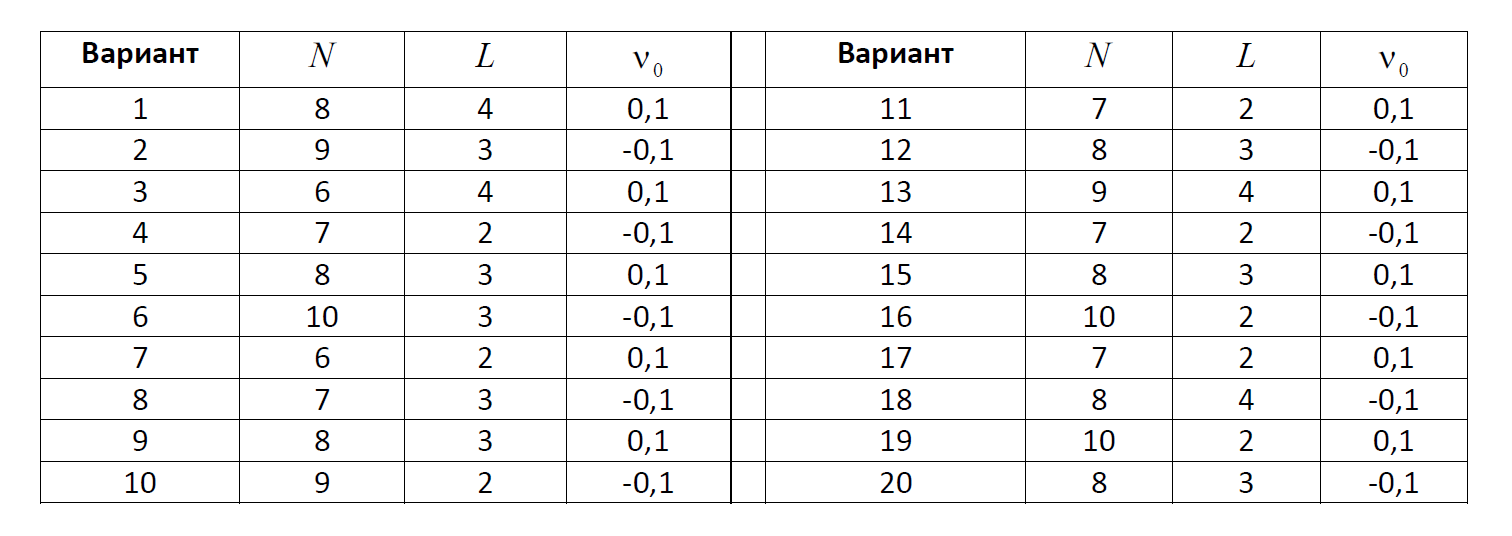

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

In [39]:
def dtft(x, M=2048):
    return  np.linspace(-0.5, 0.5, M), np.fft.fftshift(np.fft.fft(x, M))

def plot(x, y, xlabel, ylabel, title):
    %matplotlib widget
    plt.figure(figsize=[8, 3])
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
def plot2(xsPack, ysPack, xlabel, ylabel, title, legendsPack = []):
    clrs = ['r', 'g', 'b', 'black', 'yellow']
    %matplotlib widget
    plt.figure(figsize=[8, 3])
    plt.grid(True)
    for i in range(len(xsPack)):
        plt.plot(xsPack[i], ysPack[i], label= "" if len(legendsPack) <= i else legendsPack[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
def stem(x, y, xlabel, ylabel, title):
    %matplotlib widget
    plt.figure(figsize=[8, 3])
    plt.stem(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
def stem2(xsPack, ysPack, xlabel, ylabel, title, legendsPack = []):
    clrs = ['red', 'green', 'blue', 'black', 'yellow']
    %matplotlib widget
    plt.figure(figsize=[8, 3])
    plt.grid(True)
    for i in range(len(xsPack)):
        markerline, stemlines, baseline = plt.stem(xsPack[i], ysPack[i],
                                                   label= "" if len(legendsPack) <= i else legendsPack[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
def impulse_signal(k, N):
    return 1 if (k < N and k >= 0) else 0
    

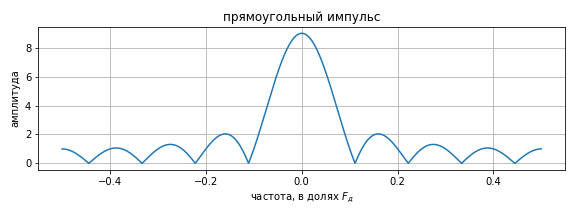

In [96]:
N = 9
L = 2

signal = np.array([impulse_signal(k, N) for k in np.arange(N)])
# print(signal)

spectre = dtft(signal)
plot(spectre[0], np.abs(spectre[1]), r'частота, в долях $F_д$', "амплитуда", "прямоугольный импульс")


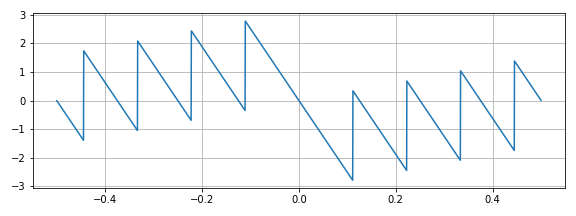

In [97]:
plot(spectre[0], np.angle(spectre[1]), "", "","")

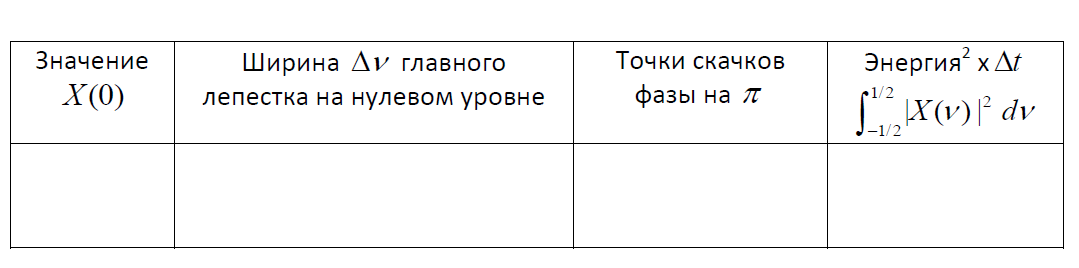

$^2$ Для дискретного сигнала рассматривают энергию, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


| $X_0$ | $\Delta \nu$ | скачок фазы на $\pi$ | мощность |
|-------|--------------|----------------------|----------|
| 9     | $0.22F_d$    | $0.111F_d$           | 9.00     |
|       |              |                      |          |

In [72]:
def get_power(spectre):
    deltaNu = 1 / (len(spectre) - 1)
    integral = 0
    for i in range(1, len(spectre)):
        ampl = ((spectre[i] + spectre[i - 1]) / 2)
        integral += ampl * np.conjugate(ampl) * deltaNu
    return integral

print('power =', get_power(spectre[1]))

power = (9.003427972543872+0j)


## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


In [73]:
L = 2
def decimate(signal):
    newSignal = np.zeros(len(signal) * L)
    for i in range(len(signal)):
        newSignal[i * 2] = signal[i]
    return newSignal

# decimate([impulse_signal(k, N) for k in range(N)])

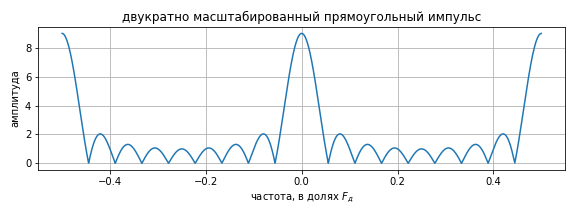

In [74]:
dtft_result = dtft(decimate([impulse_signal(k, N) for k in range(N)]), 2049)
plot(dtft_result[0],np.abs(dtft_result[1]), 
     r'частота, в долях $F_д$',
     "амплитуда",
     "двукратно масштабированный прямоугольный импульс")


Теперь построим $X_N(\nu L)$

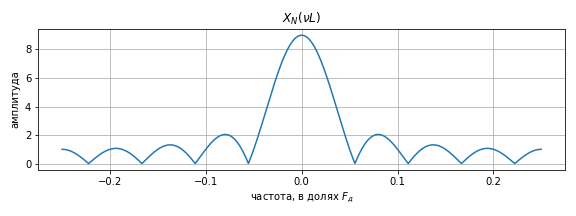

In [75]:

mSignal = [impulse_signal(k, N) for k in range(N)]
dtft_result = dtft(mSignal, 2049)

def compress(spectre):   #for odd array lengthes only and L = 2
    L = 2
    midID = np.ceil(len(spectre) / 2) - 1
    length = len(spectre)
    shift = 0
    res = np.array([], dtype=complex)
    if (length  // 2) % 2 == 0:
        res.resize(length // 2 + 1)
        shift = 0
    else:
        res.resize(length // 2 - 2 + 1)
        shift = 1
    
    for i in range(len(res)):
        res[i] = spectre[shift + i * 2]
        # print(res[i],'---', spectre[shift + i * 2])
        
    deltaNu = 1 / (len(spectre) - 1)
    axis = np.linspace(-0.5 / L + shift * deltaNu, 0.5 / L - shift * deltaNu, len(res))
    
    return axis, res

axis, spectre = compress(dtft_result[1])
plot(axis, np.abs(spectre), r'частота, в долях $F_д$',
     "амплитуда",
     r"$X_N(\nu L)$")

In [76]:
def find_zero_in_range(axis, signal, leftX, rightX): #for positive funcs only
    for i in range(len(axis) - 1):
        eps = 0.01
        x = axis[i]
        y = signal[i]
        if (y < eps and x > leftX and x < rightX):
            return x
    return None
    
nu0 = find_zero_in_range(dtft_result[0], np.abs(dtft_result[1]), 0, 0.1)
# print(dtft_result[1], 2 * nu0)

$\Delta \nu = 0.11$, что в 2 раза меньше, чем для предыдущего сигнала

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


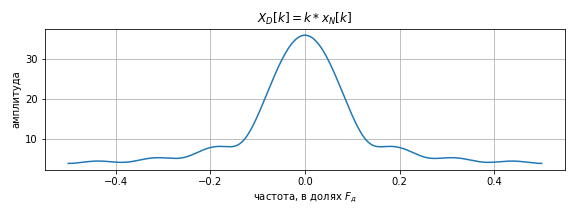

In [47]:
mSignal = [k * impulse_signal(k, N) for k in range(N)]
axis, spectre = dtft(mSignal)
spectre = np.abs(spectre)

plot(axis, spectre, 
     r'частота, в долях $F_д$',
     "амплитуда",
     r"$X_D[k] = k*x_N[k]$")

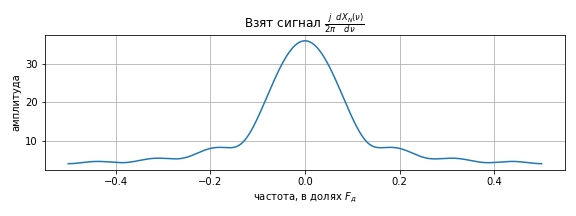

In [77]:
mSignal = [impulse_signal(k, N) for k in range(N)]
axis, spectre = dtft(mSignal)
deltaNu = 1 / (len(spectre) - 1)
spectre = np.abs(np.diff(spectre) / deltaNu * 1j / (2 * np.pi))

plot(axis[:-1], spectre, 
     r'частота, в долях $F_д$',
     "амплитуда",
     r"Взят сигнал $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$")

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 


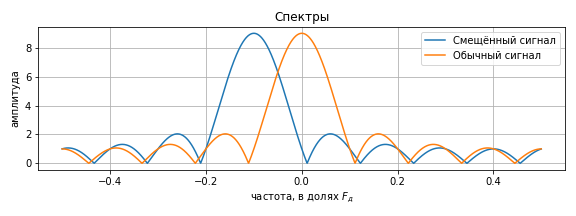

In [98]:
nu0 = -0.1
mSignal = [np.exp(1j * 2 * np.pi * nu0 * k) * impulse_signal(k, N) for k in range(N)]
mAxis, mSpectre = dtft(mSignal)

mSignalNorm = [impulse_signal(k, N) for k in range(N)]
mAxisNorm, mSpectreNorm = dtft(mSignalNorm)
plot2([mAxis, mAxisNorm], [np.abs(mSpectre), np.abs(mSpectreNorm)], 
     r'частота, в долях $F_д$',
     "амплитуда",
     r"Спектры",
     ["Смещённый сигнал", "Обычный сигнал"])

а) Аналитическая форма записи $X_S(\nu) = X_N(\nu - \nu_0)$

б) Практика моделирования подтверждает теорию

в) Как раз таки потому что его сместили в сторону.

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

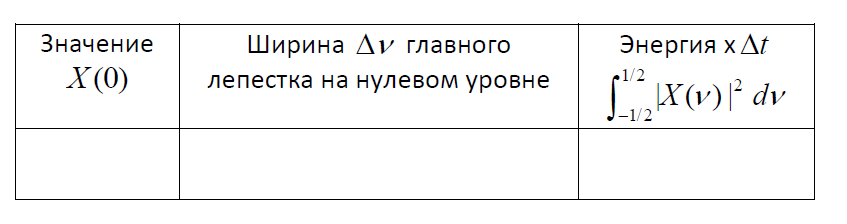

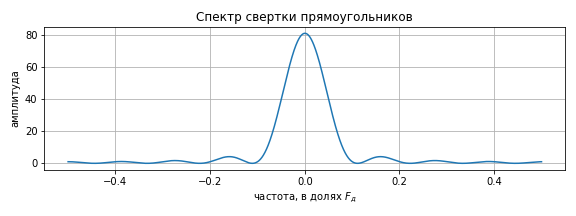

In [79]:
impulse = [impulse_signal(k, N) for k in range(N)]
mSignal = np.convolve(impulse, impulse)
mAxis, mSpectre = dtft(mSignal)
plot(mAxis, np.abs(mSpectre),
     r'частота, в долях $F_д$',
     "амплитуда",
     r"Спектр свертки прямоугольников")

In [80]:
power = get_power(mSpectre)
deltaNu = 2 * find_zero_in_range(mAxis, np.abs(mSpectre), 0, 0.14)
print(power, deltaNu)

(489.1554596621528+0j) 0.2212994626282363


Согласно теореме о свертке, свертке  во временной области соответствует произведение в частотной и наоборот. ПОэтому аналитическая формула сигнала такова
\begin{equation}
X(\nu) = (exp^{-j \pi \nu (N - 1)} \frac{\sin{\pi \nu N}}{\sin{\pi \nu}})^2
\end{equation}

| $\Delta \nu$ | мощность |
|--------------|----------|
| $0.199F_d$   | 670      |

# Занятие 2. Основные свойства ДПФ

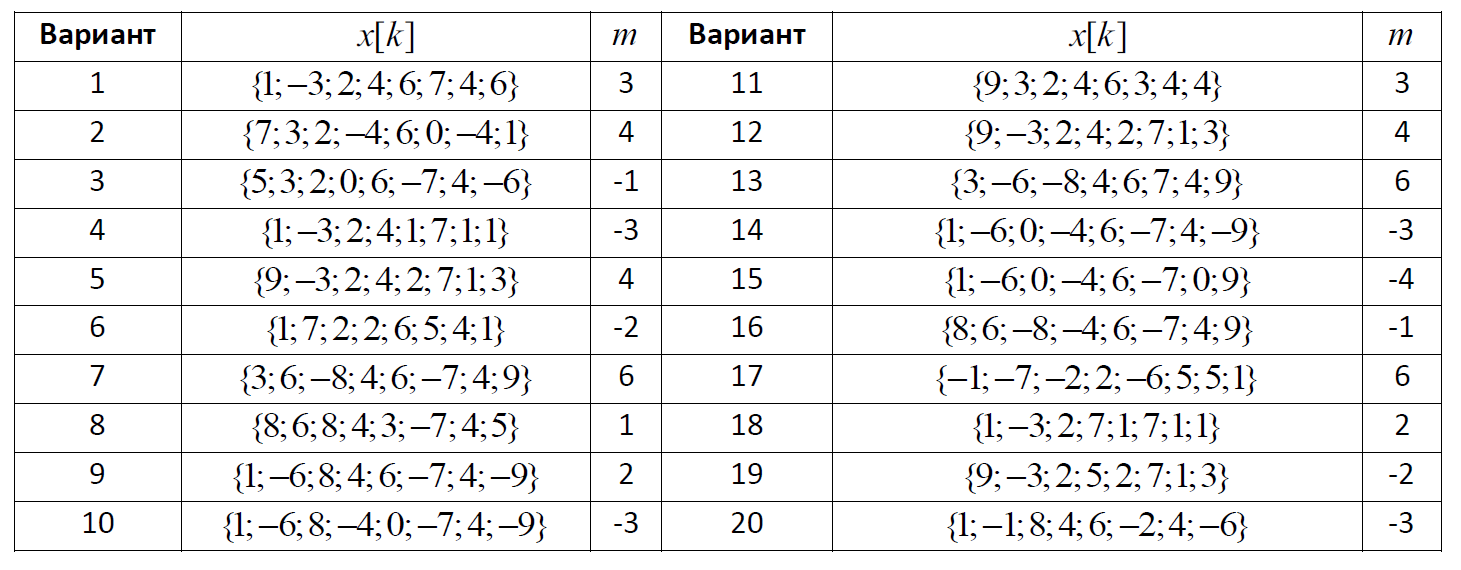

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


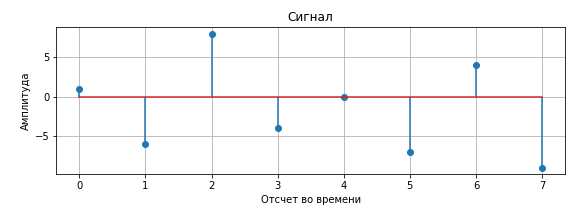

In [81]:
mSignal = np.array([1, -6, 8, -4, 0, -7, 4, -9])
N = len(mSignal)
k=np.arange(N)

W = dft(N)
mSpectre = W @ mSignal

stem(k, mSignal, "Отсчет во времени", "Амплитуда", "Сигнал")


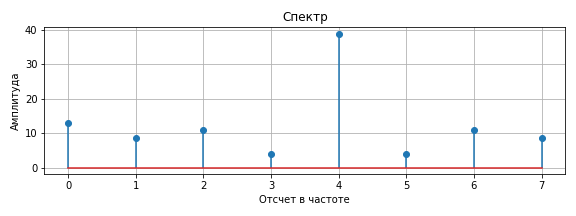

In [82]:
stem(k, np.abs(mSpectre), "Отсчет в частоте", "Амплитуда", "Спектр")

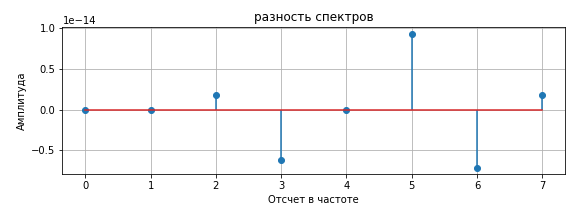

In [83]:
mSpectre2 = np.fft.fft(mSignal)
stem(k, np.abs(mSpectre2) - np.abs(mSpectre), "Отсчет в частоте", "Амплитуда", "разность спектров")

Спектры совпадают

## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


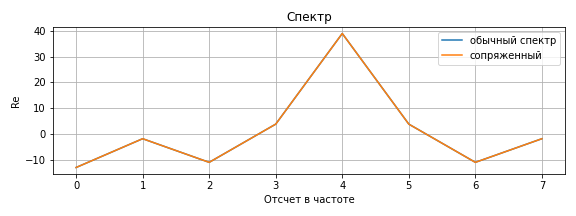

In [84]:
N = 8
k = np.arange(N)
mSignal = np.array([1, -6, 8, -4, 0, -7, 4, -9])
# mSignal = np.cos(np.linspace(0, 7, N))
W = dft(N)
mSpectre = W @ mSignal
mSpectreConjugate = np.conjugate(mSpectre)

plot2([k, k], [np.real(mSpectre), np.real(mSpectreConjugate)], 
      "Отсчет в частоте", 
      "Re", 
      "Спектр", ["обычный спектр", "сопряженный"])


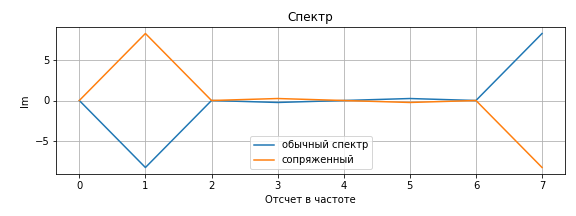

In [85]:
plot2([k, k], [np.imag(mSpectre), np.imag(mSpectreConjugate)], 
      "Отсчет в частоте", 
      "Im", 
      "Спектр", ["обычный спектр", "сопряженный"])

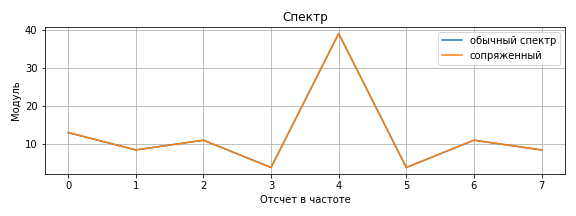

In [86]:
plot2([k, k], [np.abs(mSpectre), np.abs(mSpectreConjugate)], 
      "Отсчет в частоте", 
      "Модуль", 
      "Спектр", ["обычный спектр", "сопряженный"])

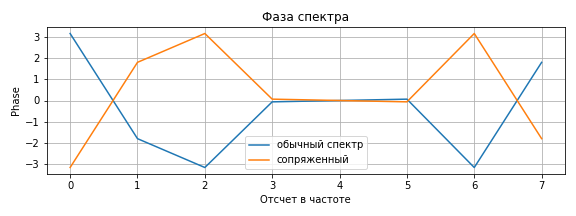

In [87]:
plot2([k, k], [np.angle(mSpectre), np.angle(mSpectreConjugate)], 
      "Отсчет в частоте", 
      "Phase", 
      "Фаза cпектра", ["обычный спектр", "сопряженный"])

## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


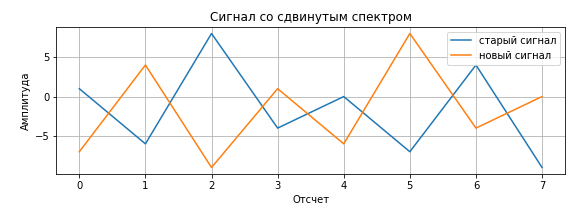

In [88]:
N = 8
k = np.arange(N)
mSignal = np.array([1, -6, 8, -4, 0, -7, 4, -9])
m = -3
newSignal = np.zeros(N)
for i in range(N):
    newSignal[(i - m) % N] = mSignal[i]
plot2([k, k], [mSignal, newSignal], 
      "Отсчет", 
      "Амплитуда", 
      "Сигнал со сдвинутым спектром", ["старый сигнал", "новый сигнал"])

# Занятие 3. Связь ДВПФ и ДПФ

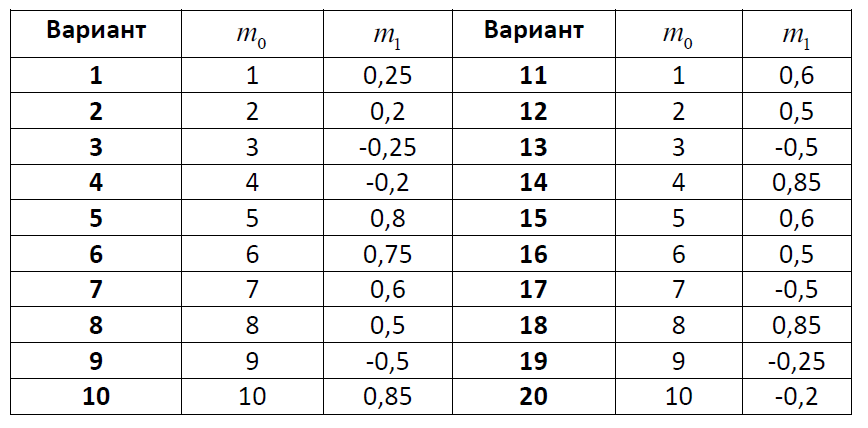

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=\left\{ \begin{array}{*{35}{l}}
   \sin \left( \dfrac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \dfrac{2\pi }{N}\left( {{m}_{0}}+0,25 \right)k \right),\ 0\le k\le N-1;  \\
   0,\ \ \text{при других }k.  \\
\end{array} \right.$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

/tmp/ipykernel_29047/305550065.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  res[i] = nparr[i]


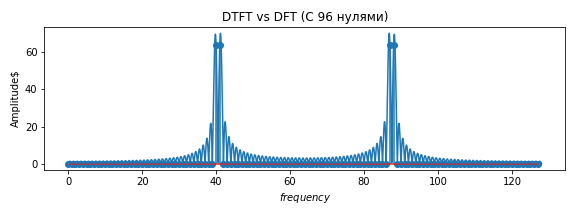

In [99]:
m0 = 10
m1 = 0.85
N = 32
zerosAdd = 96   
newN = N + zerosAdd

def mDFT(_signal, N):
    X = np.zeros(N, dtype=complex)
    for n in range(N):
        X[n] = np.sum([_signal[k] * np.exp(-1j * 2 * np.pi * k * n / N) for k in range(N)])
    return X

def addZeros(nparr, number):
    res = np.zeros(len(nparr) + number)
    for i in range(len(nparr)):
        res[i] = nparr[i]
    return res

mSignal = np.array([np.sin(2 * np.pi / N * m0 * k) + np.sin(2 * np.pi / N * (m0 + 0.25) * k)  for k in range(N * 4)], dtype = complex)
mAxisDtft, mSpectreDtft = np.linspace(0, newN, 10000), np.fft.fft(mSignal, 10000)

mSignal = addZeros(mSignal, zerosAdd)
mSpectreDft = mDFT(mSignal, newN)
mAxisDft = np.linspace(0, 1 - 1 / 128, newN) * newN
# mAxisDft = np.linspace(0, 127, newN)


# newSpectreDft = np.zeros(newN)
# for i in range(newN):
#     newSpectreDft[(i + 0)] = mSpectreDft[i]
# mSpectreDft = newSpectreDft

plt.figure(figsize=[8, 3])
plt.stem(mAxisDft, np.abs(mSpectreDft))
plt.plot(mAxisDtft, np.abs(mSpectreDtft))
plt.title('DTFT vs DFT (C 96 нулями)')
plt.xlabel('$frequency$')
plt.ylabel('Amplitude$')
plt.tight_layout()
plt.show()

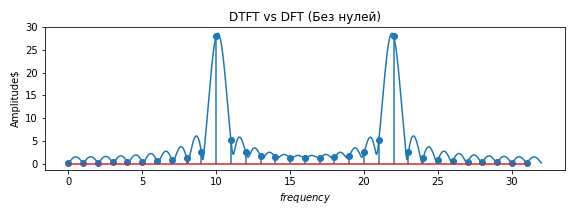

In [90]:
mSignal = np.array([np.sin(2 * np.pi / N * m0 * k) + np.sin(2 * np.pi / N * (m0 + 0.25) * k)  for k in range(N)], dtype = complex)

mAxisDtft, mSpectreDtft = np.linspace(0, N, 10000), np.fft.fft(mSignal, 10000)

mSpectreDft = mDFT(mSignal, N)
mAxisDft = np.arange(N)

plt.figure(figsize=[8, 3])
plt.stem(mAxisDft, np.abs(mSpectreDft))
plt.plot(mAxisDtft, np.abs(mSpectreDtft))
plt.title('DTFT vs DFT (Без нулей)')
plt.xlabel('$frequency$')
plt.ylabel('Amplitude$')
plt.tight_layout()
plt.show()

## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

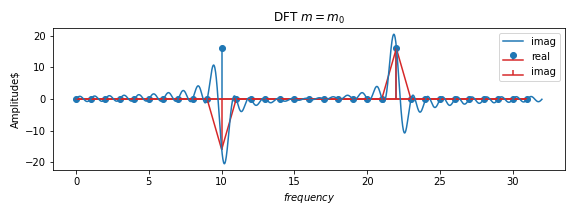

In [102]:
m0 = 10
m = m0
N = 32
cycles = 1
mSignal = np.array([np.cos(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N) for k in range(N * cycles)])

mSpectre = mDFT(mSignal, N * cycles)
mAxis = np.arange(N * cycles)

cycles = 1
mSignal = np.array([np.cos(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N) for k in range(N * cycles)])
mAxisDtft, mSpectreDtft = np.linspace(0, N, 2048), np.fft.fft(mSignal, 2048)

plt.figure(figsize=[8, 3])
plt.stem(mAxis, np.real(mSpectre), label='real')
plt.stem(mAxis, np.imag(mSpectre), label='imag',markerfmt="C3", linefmt="C3", basefmt="C3")
# plt.plot(mAxisDtft, np.real(mSpectreDtft), label='real')
plt.plot(mAxisDtft, np.imag(mSpectreDtft), label='imag')
# plt.stem(mAxis, np.abs(mSpectre), label='abs')
plt.legend()
# plt.plot(mAxisDtft, np.abs(mSpectreDtft))
plt.title(r'DFT $m = m_0$')
plt.xlabel('$frequency$')
plt.ylabel('Amplitude$')
plt.tight_layout()
plt.show()

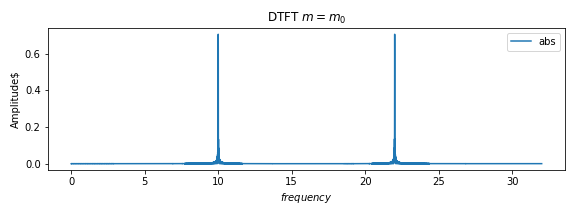

In [92]:
cycles = 100
mSignal = np.array([np.cos(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N) for k in range(N * cycles)])
mAxisDtft, mSpectreDtft = np.linspace(0, N, 10000), np.fft.fft(mSignal, 10000) / N / cycles

plt.figure(figsize=[8, 3])
plt.plot(mAxisDtft, np.abs(mSpectreDtft), label='abs')
plt.legend()
# plt.plot(mAxisDtft, np.abs(mSpectreDtft))
plt.title(r'DTFT $m = m_0$')
plt.xlabel('$frequency$')
plt.ylabel('Amplitude$')
plt.tight_layout()
plt.show()

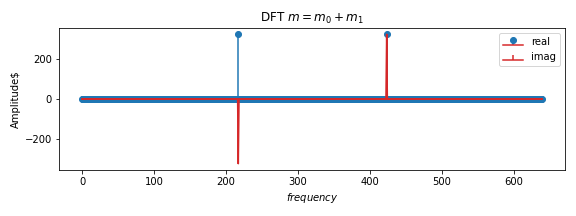

In [111]:
m0 = 10
m1 = 0.85
m = m0 + m1
N = 32
mSignal = np.array([np.cos(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N) for k in range(N * 20)])

mSpectre = mDFT(mSignal, N * 20)
mAxis = np.arange(N * 20)

mAxisDtft, mSpectreDtft = np.linspace(0, N, 2048), np.fft.fft(mSignal, 2048)

plt.figure(figsize=[8, 3])
plt.stem(mAxis, np.real(mSpectre), label='real')
plt.stem(mAxis, np.imag(mSpectre), label='imag',markerfmt="C3", linefmt="C3", basefmt="C3")
# plt.plot(mAxisDtft, np.real(mSpectreDtft), label='real')
# plt.plot(mAxisDtft, np.imag(mSpectreDtft), label='imag', color="red")


plt.legend()
# plt.plot(mAxisDtft, np.abs(mSpectreDtft))
plt.title(r'DFT $m = m_0 + m_1$')
plt.xlabel('$frequency$')
plt.ylabel('Amplitude$')
plt.tight_layout()
plt.show()

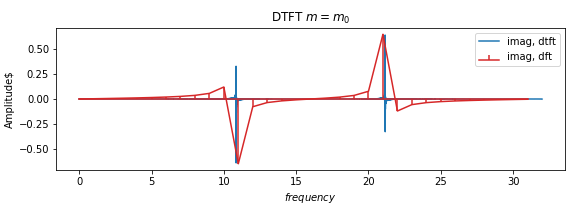

In [94]:
cycles = 100
mSignal = np.array([np.cos(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N) for k in range(N * cycles)])
mAxisDtft, mSpectreDtft = np.linspace(0, N, 10000), np.fft.fft(mSignal, 10000) / N / cycles

plt.figure(figsize=[8, 3])
plt.plot(mAxisDtft, np.imag(mSpectreDtft), label='imag, dtft')
plt.stem(mAxis, np.imag(mSpectre) / N, label='imag, dft',markerfmt="C3", linefmt="C3", basefmt="C3")

plt.legend()
# plt.plot(mAxisDtft, np.abs(mSpectreDtft))
plt.title(r'DTFT $m = m_0$')
plt.xlabel('$frequency$')
plt.ylabel('Amplitude$')
plt.tight_layout()
plt.show()

# Примеры вычислений на Python для лабораторной работы №2 "ДВПФ и ДПФ"

## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [66]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем то же самое с помощью функции `ones`

In [67]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

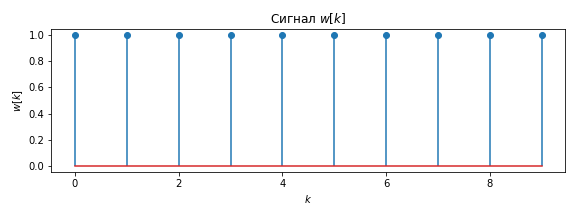

In [68]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [69]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
       -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j,
        1.0000000e+00-2.4492936e-16j,  3.0616170e-16+1.0000000e+00j,
       -1.0000000e+00+3.6739404e-16j, -4.2862638e-16-1.0000000e+00j,
        1.0000000e+00-4.8985872e-16j,  5.5109106e-16+1.0000000e+00j])

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [70]:
w2=signal.convolve(w, w)
print(w2)
print(len(w), len(w2))

AttributeError: 'numpy.ndarray' object has no attribute 'convolve'

Выведем график для такой последовательности:

In [ ]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k)
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [ ]:
w2*w2

## Вычисление ДВПФ

Определим ДВПФ последовательности $w[k]=\sum_{m=0}^{N-1} \mathbf{1}[k-m]$ 

In [ ]:
# def dtft(x, M=2048):
#     return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [ ]:
nu, W = dtft(w, M=2048)

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `W` — значения ДВПФ $W(\nu )$ в этих точках, 
* `dtft` — функция, 
* `w` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Построим график для модуля ДВПФ

In [ ]:
plt.figure(figsize=[8, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Теперь выведем фазовую часть ДВПФ

In [ ]:
plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


In [ ]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)
W8 = dft(N)
Xn = W8 @ x
Xn

Построим графики. 

In [ ]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [ ]:
Xn1=np.fft.fft(x)
Xn1

Сравним результаты.

In [ ]:
max(abs(Xn1-Xn))

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [ ]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [ ]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [ ]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [ ]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

## Интерполяция ДВПФ добавлением нулевых отсчетов

Построим на одном графике модули ДПФ и ДВПФ $N$-точечной последовательности 

$$x[k]=\sin \left(2\pi \frac{6.5}{16}\right),\;\;k=0,1,\dots ,N-1.$$

In [ ]:
N=16
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*5.5*k/N)

In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Здесь функция `np.fft.fftshift` позволяет циклически сдвинуть вычисленные отсчеты ДПФ так, чтобы они соответствовали частотам$\nu_n \in [-0.5;0.5)$, $\nu_n =-0.5+\frac{n}{N}.$

Относительная частота синусойды $\nu_0 =\frac{6.5}{16}$ не попадет на сетку частот ДПФ. В результате спектральные максимумы недостаточно хорошо визуализируются отсчетами ДПФ. Чтобы это улучшить, добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции `np.fft.fft(x, M)` равный новому числу отсчетов. 


In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()